In [1]:
import pandas as pd

df_vnx = pd.read_excel(r'D:\Downloads\DSTC vòng 3\cleaned data\HNXINDEX_cleaned.xlsx')
df_vnx.drop("Unnamed: 0", axis =1, inplace = True)
df_vnx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63651 entries, 0 to 63650
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ticker           63651 non-null  object 
 1   timestamp        63651 non-null  object 
 2   open             63651 non-null  float64
 3   high             63651 non-null  float64
 4   low              63651 non-null  float64
 5   close            63651 non-null  float64
 6   volume           63651 non-null  int64  
 7   ema_50           63651 non-null  float64
 8   ema_200          63651 non-null  float64
 9   macd             63651 non-null  float64
 10  macd_signal      63651 non-null  float64
 11  macd_diff        63651 non-null  float64
 12  rsi              63651 non-null  float64
 13  bollinger_hband  63651 non-null  float64
 14  bollinger_lband  63651 non-null  float64
 15  mfi              63651 non-null  float64
 16  golden_cross     63651 non-null  int64  
 17  death_cross 

In [2]:
df_vnx['min_price_in_future'] = df_vnx.groupby('ticker')['low'].shift(-10).rolling(window=10).min()
df_vnx['future_max_drawdown'] = (df_vnx['min_price_in_future'] / df_vnx['close']) - 1
df_vnx.dropna(subset=['future_max_drawdown'], inplace=True)


df_vnx['T2_drawdown'] = df_vnx.groupby('timestamp')['future_max_drawdown'].transform(lambda x: x.quantile(0.25))


In [3]:
print(df_vnx['future_max_drawdown'].describe(percentiles=[0.1, 0.25,0.3, 0.5, 0.7, 0.75, 0.9]))

count    62207.000000
mean        -0.074459
std          0.077013
min         -0.644737
10%         -0.174757
25%         -0.099602
30%         -0.088235
50%         -0.050066
70%         -0.027273
75%         -0.022901
90%         -0.008403
max          0.200000
Name: future_max_drawdown, dtype: float64


In [4]:
import numpy as np

# conditions = [
#     df_vnx['future_max_drawdown'] <= df_vnx['T1_drawdown'], 
#     (df_vnx['future_max_drawdown'] > df_vnx['T1_drawdown']) & (df_vnx['future_max_drawdown'] <= df_vnx['T2_drawdown']), 
#     df_vnx['future_max_drawdown'] > df_vnx['T2_drawdown'] 
# ]

# labels = [2,1,0] 


conditions = [
    df_vnx['future_max_drawdown'] <= df_vnx['T2_drawdown'],  
    df_vnx['future_max_drawdown'] > df_vnx['T2_drawdown'] 
]


labels = [1,0] 
df_vnx['risk_label'] = np.select(conditions, labels)

df_vnx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62207 entries, 9 to 63640
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ticker               62207 non-null  object 
 1   timestamp            62207 non-null  object 
 2   open                 62207 non-null  float64
 3   high                 62207 non-null  float64
 4   low                  62207 non-null  float64
 5   close                62207 non-null  float64
 6   volume               62207 non-null  int64  
 7   ema_50               62207 non-null  float64
 8   ema_200              62207 non-null  float64
 9   macd                 62207 non-null  float64
 10  macd_signal          62207 non-null  float64
 11  macd_diff            62207 non-null  float64
 12  rsi                  62207 non-null  float64
 13  bollinger_hband      62207 non-null  float64
 14  bollinger_lband      62207 non-null  float64
 15  mfi                  62207 non-null  floa

In [5]:
df_vnx.dropna(axis = 0, how = 'any', inplace = True)
df_vnx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62207 entries, 9 to 63640
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ticker               62207 non-null  object 
 1   timestamp            62207 non-null  object 
 2   open                 62207 non-null  float64
 3   high                 62207 non-null  float64
 4   low                  62207 non-null  float64
 5   close                62207 non-null  float64
 6   volume               62207 non-null  int64  
 7   ema_50               62207 non-null  float64
 8   ema_200              62207 non-null  float64
 9   macd                 62207 non-null  float64
 10  macd_signal          62207 non-null  float64
 11  macd_diff            62207 non-null  float64
 12  rsi                  62207 non-null  float64
 13  bollinger_hband      62207 non-null  float64
 14  bollinger_lband      62207 non-null  float64
 15  mfi                  62207 non-null  floa

In [6]:
df_vnx["risk_label"].value_counts()

risk_label
0    46606
1    15601
Name: count, dtype: int64

In [7]:
df = df_vnx
df.reset_index(inplace = True)
df.drop("index", axis =1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62207 entries, 0 to 62206
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ticker               62207 non-null  object 
 1   timestamp            62207 non-null  object 
 2   open                 62207 non-null  float64
 3   high                 62207 non-null  float64
 4   low                  62207 non-null  float64
 5   close                62207 non-null  float64
 6   volume               62207 non-null  int64  
 7   ema_50               62207 non-null  float64
 8   ema_200              62207 non-null  float64
 9   macd                 62207 non-null  float64
 10  macd_signal          62207 non-null  float64
 11  macd_diff            62207 non-null  float64
 12  rsi                  62207 non-null  float64
 13  bollinger_hband      62207 non-null  float64
 14  bollinger_lband      62207 non-null  float64
 15  mfi                  62207 non-null 

In [8]:
import numpy as np
import pandas as pd

def add_features(df):
    df = df.copy()

    df["volatility_5d"] = df.groupby("ticker")["return"].rolling(5).std().reset_index(0, drop=True)
    df["volatility_10d"] = df.groupby("ticker")["return"].rolling(10).std().reset_index(0, drop=True)

    df["volume_change"] = df.groupby("ticker")["volume"].pct_change()
    
    df["obv"] = (np.sign(df["return"].fillna(0)) * df["volume"]).groupby(df["ticker"]).cumsum()
    
    df["volume_pct_20d"] = df.groupby("ticker")["volume"].transform(
        lambda x: x.rolling(20).apply(lambda s: pd.Series(s).rank(pct=True).iloc[-1])
    )

    lag_cols = ["close", "return", "rsi", "macd", "macd_diff", "bollinger_pct"]
    for col in lag_cols:
        for lag in [1, 2, 3]:
            df[f"{col}_lag{lag}"] = df.groupby("ticker")[col].shift(lag)
    
    return df

df = add_features(df)


df.dropna(inplace=True)

print("Số feature sau khi thêm:", df.shape[1])
df.head()


Số feature sau khi thêm: 49


,ticker,timestamp,open,high,low,close,volume,ema_50,ema_200,macd,...,rsi_lag3,macd_lag1,macd_lag2,macd_lag3,macd_diff_lag1,macd_diff_lag2,macd_diff_lag3,bollinger_pct_lag1,bollinger_pct_lag2,bollinger_pct_lag3
19,AAV,2022-05-11 00:00,11980.88,12753.84,11980.88,12753.84,246000,17778.930459,17778.930459,-2036.950160,...,26.581658,-2131.975342,-2123.874752,-2053.129711,-37.716450,-39.044972,21.938825,0.209450,0.162606,0.243246
20,AAV,2022-05-12 00:00,12947.08,13236.94,11497.78,11691.02,274500,17540.188873,17540.188873,-2024.070485,...,22.946359,-2036.950160,-2131.975342,-2123.874752,45.846986,-37.716450,-39.044972,0.319550,0.209450,0.162606
21,AAV,2022-05-13 00:00,11594.40,11980.88,10531.58,10531.58,300100,17265.341466,17265.341466,-2083.404182,...,25.479145,-2024.070485,-2036.950160,-2131.975342,46.981329,45.846986,-37.716450,0.231697,0.319550,0.209450
22,AAV,2022-05-16 00:00,10821.44,11401.16,10628.20,10724.82,178800,17008.850428,17008.850428,-2090.733042,...,33.344280,-2083.404182,-2024.070485,-2036.950160,-9.881894,46.981329,45.846986,0.127928,0.231697,0.319550
23,AAV,2022-05-17 00:00,10724.82,11787.64,10628.20,11787.64,160900,16804.097078,16804.097078,-1987.865647,...,29.638634,-2090.733042,-2083.404182,-2024.070485,-13.768604,-9.881894,46.981329,0.151571,0.127928,0.231697


In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import torch
import torch.nn as nn
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Features = [
       'open', 'high', 'low', 'close', 'volume',
       'ema_50', 'ema_200', 'macd', 'macd_signal', 'macd_diff', 'rsi',
       'bollinger_hband', 'bollinger_lband', 'mfi',
       'return', 'bollinger_pct', 'bollinger_bw',
       'volatility_5d', 'volatility_10d',
       'volume_change', 'obv', 'volume_pct_20d', 'close_lag1', 'close_lag2',
       'close_lag3', 'return_lag1', 'return_lag2', 'return_lag3', 'rsi_lag1',
       'rsi_lag2', 'rsi_lag3', 'macd_lag1', 'macd_lag2', 'macd_lag3',
       'macd_diff_lag1', 'macd_diff_lag2', 'macd_diff_lag3',
       'bollinger_pct_lag1', 'bollinger_pct_lag2', 'bollinger_pct_lag3'
]


# Features = [
#        'open', 'high', 'low', 'close', 'volume',
#        'ema_50', 'ema_200', 'macd', 'macd_signal', 'rsi',
#        'bollinger_hband', 'bollinger_lband', 'mfi', 'return', 'bollinger_pct', 'bollinger_bw'
#        ]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import lightgbm as lgb

test_size = 0.2
random_state = 42
all_Xtrain_dfs = []
all_ytrain_dfs = []
all_Xtest_dfs = []
all_ytest_dfs = []

for ticker in df["ticker"].unique():
    df_ticker = df[df["ticker"] == ticker].copy()
    df_ticker.sort_values(by = "timestamp", inplace = True)
    split_index = int((len(df_ticker) * (1-test_size)))
    df_ticker_train = df_ticker[:split_index]
    df_ticker_test = df_ticker[split_index:]
    all_Xtrain_dfs.append(df_ticker_train[Features])
    all_Xtest_dfs.append(df_ticker_test[Features])
    all_ytrain_dfs.append(df_ticker_train["risk_label"])
    all_ytest_dfs.append(df_ticker_test["risk_label"])


X_train = pd.concat(all_Xtrain_dfs)
X_test = pd.concat(all_Xtest_dfs)
y_train = pd.concat(all_ytrain_dfs)
y_test = pd.concat(all_ytest_dfs)

print(f"Kích thước tập Train: X={X_train.shape}, y={y_train.shape}")
print(f"Kích thước tập Test: X={X_test.shape}, y={y_test.shape}")



Kích thước tập Train: X=(48607, 40), y=(48607,)
Kích thước tập Test: X=(12156, 40), y=(12156,)


In [11]:
!pip install imblearn

In [12]:

# from imblearn.combine import SMOTEENN

# smote_enn = SMOTEENN(random_state=42)
# X_train_smote, y_train_smote = smote_enn.fit_resample(X_train, y_train)

# # Kiểm tra lại kích thước và phân bổ lớp SAU KHI SMOTE
# print(f"\nKích thước tập Train SAU KHI SMOTE: X={X_train_smote.shape}, y={y_train_smote.shape}")
# print("\nPhân bổ lớp trên tập Train SAU KHI SMOTE:")
# print(y_train_smote.value_counts(normalize=True))

[LightGBM] [Info] Number of positive: 12184, number of negative: 36423
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9985
[LightGBM] [Info] Number of data points in the train set: 48607, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250663 -> initscore=-1.095077
[LightGBM] [Info] Start training from score -1.095077
              precision    recall  f1-score   support

           0     0.8001    0.8522    0.8254      9100
           1     0.4541    0.3662    0.4054      3056

    accuracy                         0.7300     12156
   macro avg     0.6271    0.6092    0.6154     12156
weighted avg     0.7132    0.7300    0.7198     12156



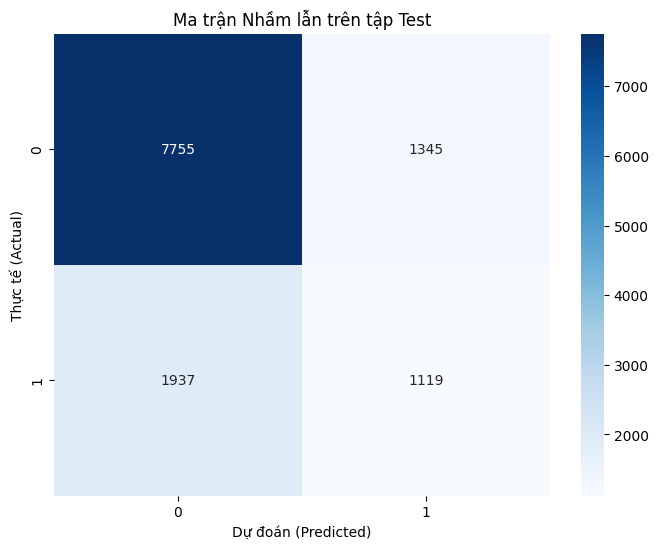

In [ ]:
import lightgbm as lgb
from collections import Counter
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pickle 


lgbm_classifier = lgb.LGBMClassifier(random_state=42, is_unbalance=True)
# counter = Counter(y_train)
# neg_count = counter[0]
# pos_count = counter[1]

# scale_pos_weight_value = neg_count / pos_count

# print(f"Số mẫu lớp 0 (Không rủi ro cao): {neg_count}")
# print(f"Số mẫu lớp 1 (Rủi ro cao): {pos_count}")
# print(f"Giá trị scale_pos_weight được tính toán: {scale_pos_weight_value:.4f}")



lgbm_classifier_scaled = lgb.LGBMClassifier(random_state=42)


lgbm_classifier_scaled.fit(X_train, y_train)
model_filename = 'lgbm_model_hnx.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(lgbm_classifier_scaled, file)

y_pred_proba = lgbm_classifier_scaled.predict_proba(X_test)[:, 1]
y_pred_scaled = (y_pred_proba > 0.4).astype(int)


print(classification_report(y_test, y_pred_scaled, digits=4))
cm = confusion_matrix(y_test, y_pred_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Dự đoán (Predicted)')
plt.ylabel('Thực tế (Actual)')
plt.title('Ma trận Nhầm lẫn trên tập Test')
plt.show()